In [270]:
from pandas import read_csv
from numpy import unique
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [271]:
data = pd.read_csv('energydata_complete.csv')

In [272]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [273]:
#data.drop(['date'], axis = 1, inplace=True)

#data.drop(columns=['date'], axis = 1, inplace=True)
#data.drop(columns=['date'], inplace=True)
#data = data.drop(['date'], axis = 'columns')
data = data.drop('date', axis = 1)

In [274]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [275]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 

In [277]:
data.shape

(19735, 28)

In [278]:
#select a sample of the dataset
simple_linear_reg_data = data[["rv1", 'rv2']].sample(15, random_state=2) 

<AxesSubplot:xlabel='rv1', ylabel='rv2'>

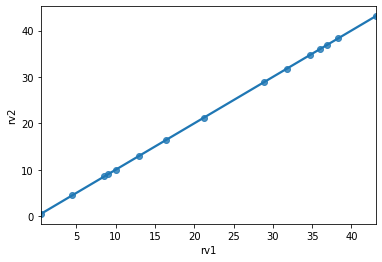

In [279]:
#regression plot
sns.regplot(x="rv1", y="rv2", data=simple_linear_reg_data)

<AxesSubplot:>

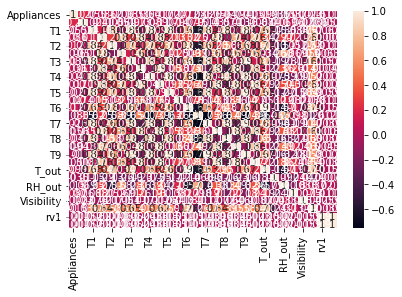

In [280]:
sns.heatmap(data.corr(), annot=True)

In [281]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [282]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_data = normalised_data.drop(columns=[ 'lights'])
randomvariable_target = normalised_data['Appliances']




#Normalize the dataset using the MinMaxScaler after removing the following columns: 
#    [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a
#    random state of 42 (for reproducibility). Run a multiple linear regression using the training set 
#    and evaluate your model on the test set. Answer the following questions:

#What is the Mean Absolute Error (in two decimal places)?

In [283]:
normalised_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [284]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [285]:
features_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


C:\Users\Omale Happiness O\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Understanding MinMaxScale'}, xlabel='Appliances', ylabel='Appliances'>

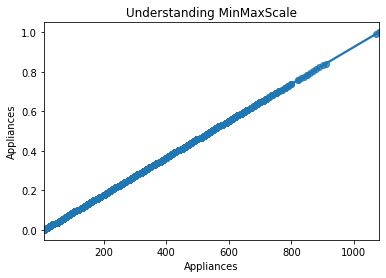

In [286]:
plt.title("Understanding MinMaxScale")
sns.regplot(data[data.columns[0]], normalised_data[normalised_data.columns[0]])

In [287]:
#x = fish.drop(['Weight'], axis = 1)
#y = fish['Weight']

x = data.drop([ 'lights'], axis =1)
y = data['Appliances']

In [288]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_data, randomvariable_target, test_size=0.25, random_state=42)

In [289]:
#initialize the model
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [290]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

#preview predictions
predicted_values

array([0.02803738, 0.07476636, 0.03738318, ..., 0.06542056, 0.06542056,
       0.08411215])

In [291]:
#MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)
print(round(mae, 2))

0.0


In [292]:
#Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

0.0

In [293]:
#●R-Squared 
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, predicted_values)

print(round(r2_score, 2))



#From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) 
#and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

1.0


In [294]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [302]:
#●Root Mean Square Error (RMSE) 
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

print(round(rmse, 2))

0.0


In [303]:
#Feature selection and lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)


from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

print(round(rmse, 2))


#Train a lasso regression model with an alpha value of 0.001 and obtain the new
#feature weights with it. How many of the features have non-zero feature weights?

0.0


In [297]:
#The coefficient we intend regularizing
linear_model.coef_

array([ 1.00000000e+00, -1.00713230e-15, -1.48501603e-15,  1.24191286e-15,
        1.54918052e-15,  7.68235310e-17,  1.19267180e-16, -2.57310706e-16,
       -2.90221817e-16, -6.16876326e-16, -6.85688420e-16, -5.83457782e-16,
        1.85076699e-15,  1.06376446e-15,  3.76019769e-16,  8.11783435e-16,
       -3.03236284e-16,  8.34433795e-16, -7.86004655e-16,  1.81128714e-15,
        3.72597601e-16, -5.71643610e-16,  4.50365037e-16, -2.35338076e-16,
       -4.37948373e-16,  1.47091558e-03, -1.47091558e-03])

In [298]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

#Train a ridge regression model with an alpha value of 0.4. Is there any change to 
#the root mean squared error (RMSE) when evaluated on the test set?

Ridge(alpha=0.4)

In [299]:
#comparing the effects of regularisation
def get_weights_data(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_data = pd.DataFrame(weights).reset_index()
    weights_data.columns = ['Features', col_name]
    weights_data[col_name].round(3)
    return weights_data



#Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [300]:
linear_model_weights = get_weights_data(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_data = get_weights_data(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_data = get_weights_data(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_data, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_data, on='Features')

In [301]:
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0           rv2        -1.470916e-03      0.000002     -0.000000
1          RH_1        -1.485016e-15      0.001858      0.000000
2            T1        -1.007132e-15     -0.000033      0.000000
3          RH_9        -7.860047e-16     -0.000144     -0.000000
4          RH_5        -6.856884e-16      0.000045      0.000000
5            T5        -6.168763e-16     -0.000068      0.000000
6            T6        -5.834578e-16      0.000736      0.000000
7        RH_out        -5.716436e-16     -0.000157     -0.000000
8     Tdewpoint        -4.379484e-16      0.000253      0.000000
9          RH_8        -3.032363e-16     -0.000520     -0.000000
10         RH_4        -2.902218e-16      0.000102      0.000000
11           T4        -2.573107e-16      0.000085      0.000000
12   Visibility        -2.353381e-16      0.000041      0.000000
13           T3         7.682353e-17      0.000972      0.000000
14         RH_3         1